# Data Science & Business Analytics Internship
## GRIP @ THE SPARKS FOUNDATION
## BY: Akanksha Pawar
## TASK 2: Exploratory Data Analysis - Retail
Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.
As a business manager, try to find out the weak areas where you can
work to make more profit.

In [1]:
#importing libraries
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#reading the data
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

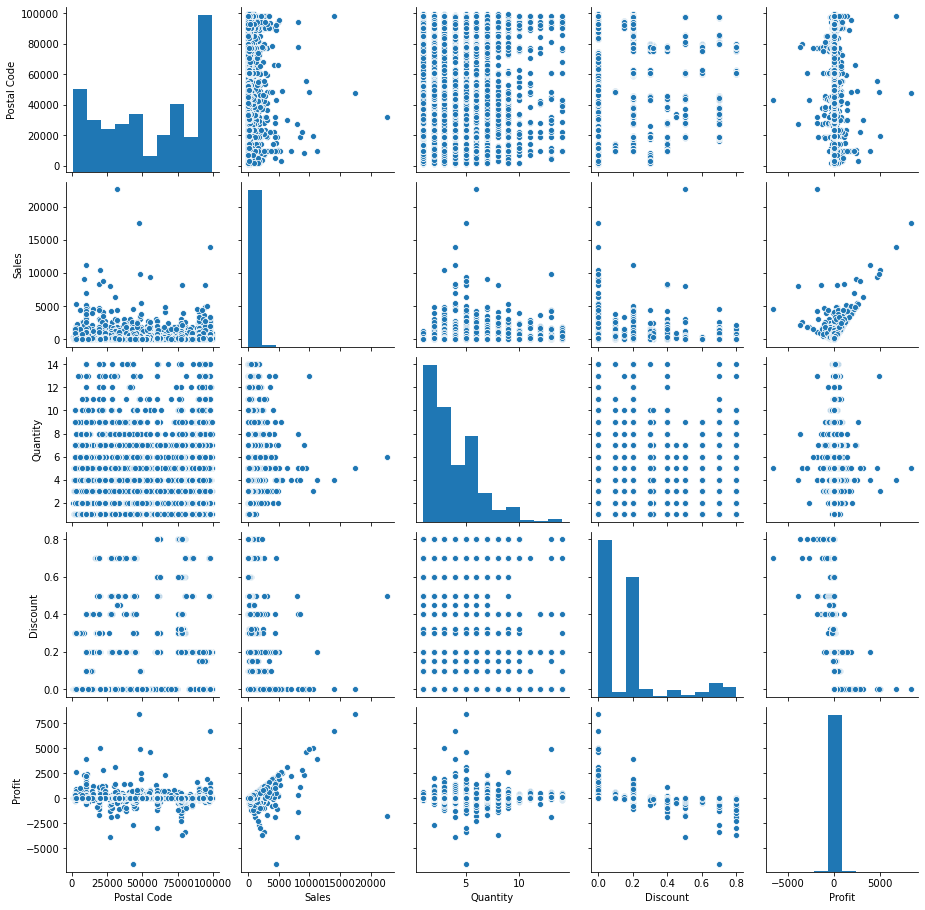

In [8]:
#visualizing data with pairplot
sns.pairplot(df)

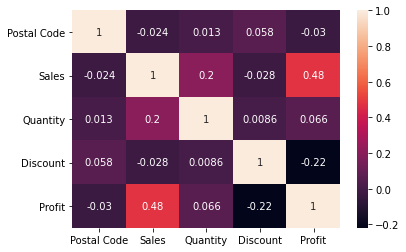

In [9]:
# correlation analysis
df.corr()
sns.heatmap(df.corr(), annot=True)
plt.show()

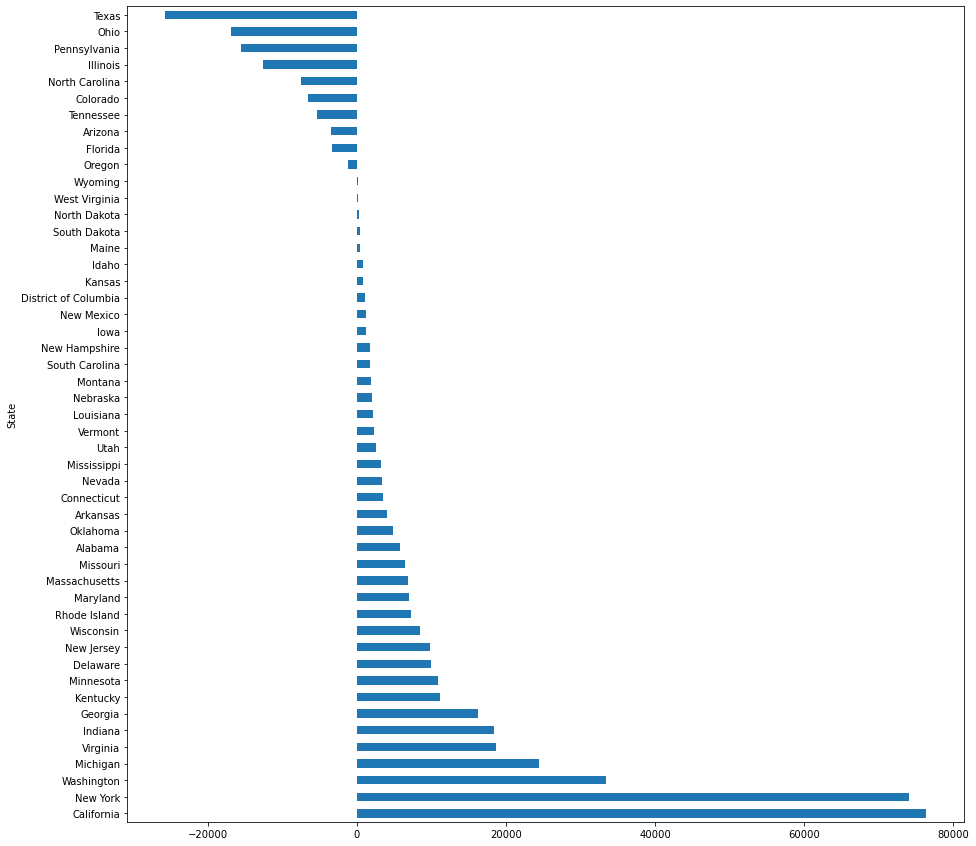

In [11]:
#statewise profit
plt.figure(figsize=(15,15))
stpr = df.groupby(['State'])['Profit'].sum().nlargest(50)
stpr.plot.barh()

We can see that california has highest profit followed by new york. Texas has highest losses.

In [16]:
# Visualizing Categories
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

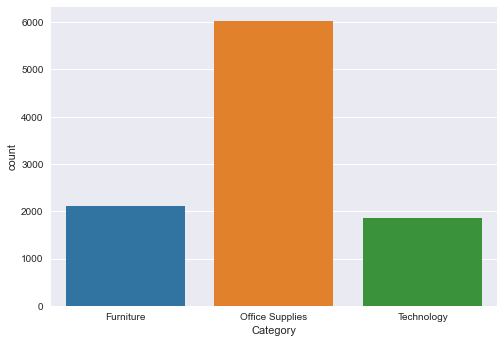

In [19]:
sns.countplot(x='Category',data=df,palette='tab10')

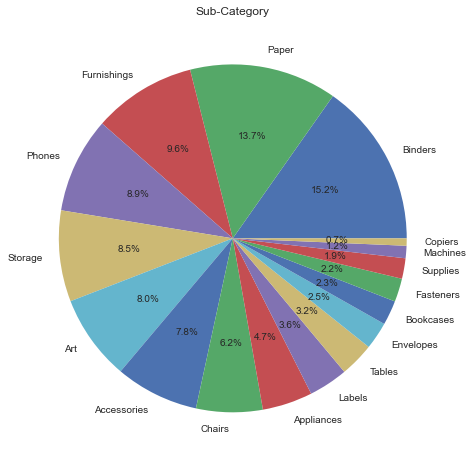

In [18]:
plt.figure(figsize = (8,8))
plt.title('Sub-Category')
plt.pie(df['Sub-Category'].value_counts(), labels=df['Sub-Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

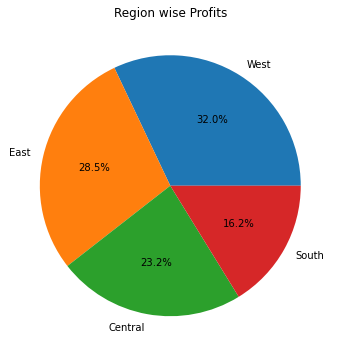

In [12]:
#Region wise Profit
plt.figure(figsize= (6,6))
plt.title('Region wise Profits')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

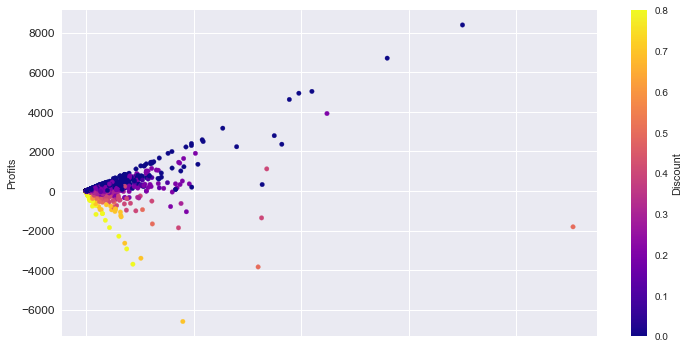

In [13]:
#Sales, Profit & Discount Interdependency
plt.style.use('seaborn')
df.plot(kind="scatter",figsize=(12,6), x="Sales",y="Profit",c="Discount",s=20,fontsize=12,colormap='plasma')
plt.ylabel('Profits')
plt.show()

High discount result in high sales but less profit.

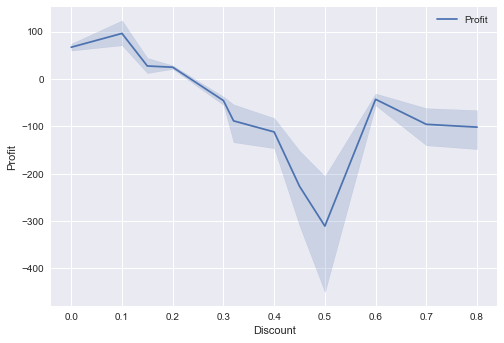

In [14]:
#Profit vs Discount
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

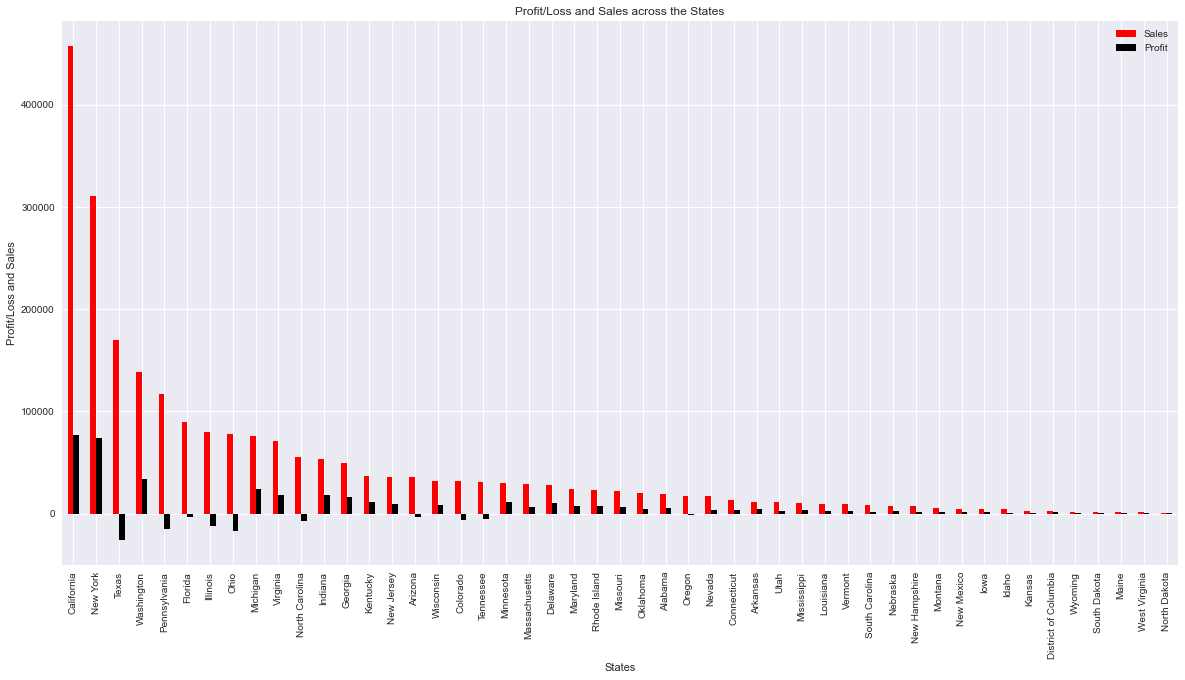

In [15]:
#Profit/Loss and Sales of Each State
pls = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['red','black'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the States')
plt.xlabel('States')
plt.ylabel('Profit/Loss and Sales')
plt.show()

## Observations-
## 1. When discount is less than 20%; it results in profit.
## 2. When discount is greater than 20%; it results in loss.
## 3. California and new york has high profits.
## 4. Should focus more on office supplies as that is the most profitable category.
## 5. Sales in south region are less.